In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

In [7]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [12]:
my_user = "@debugdiva2025"
my_pass=getpass.getpass()

 ········


In [9]:
search_item="Virat kohli"

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [11]:
driver = webdriver.Chrome()
driver.get("https://twitter.com/i/flow/login")

In [ ]:
driver.quit()

In [13]:

user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)


In [14]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [17]:
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [18]:
#Scraping tweets
all_tweets=set()

tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [19]:
all_tweets = list(all_tweets)
all_tweets[0]

"Virat Kohli and Rohit Sharma getting in a net session ahead of India's #T20WorldCup clash against Bangladesh "

In [20]:
#cleaning tweets
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,Virat Kohli and Rohit Sharma getting in a net session ahead of India's #T20WorldCup clash against Bangladesh
1,Nothing just Babar Azam showing levels to Virat Kohli that how to play quality pacer.\n\n#BabarAzam | #ViratKohli | #T20IWorldCup2024 | #USAvsIRE | #T20WC24
2,Anti National Virat Kohli \n\nFor Money For Country
3,Happy that the legendary Indian batsman Virat Kohli is there in Kolkata on his birthday to play a historic match for our country!! \nA very happy birthday to Virat \n@imVkohli\n !! \nWish him and his family all happiness and success!!
4,Inject it in my veins\n\n#INDvsPAK #AsiaCup2023 #INDvPAK #ViratKohli


In [23]:
one_tweet=df.iloc[4]['tweets']
one_tweet

'Inject it in my veins\n\n#INDvsPAK #AsiaCup2023 #INDvPAK #ViratKohli'

In [24]:

from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"


In [24]:
df.shape

(54, 1)

In [25]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,Virat Kohli and Rohit Sharma getting in a net session ahead of India's #T20WorldCup clash against Bangladesh,Virat Kohli Rohit Sharma getting net session ahead India's,0.000000,0.000000,neutral
1,Nothing just Babar Azam showing levels to Virat Kohli that how to play quality pacer.\n\n#BabarAzam | #ViratKohli | #T20IWorldCup2024 | #USAvsIRE | #T20WC24,Nothing Babar Azam showing levels Virat Kohli play quality pacer. | | | |,0.000000,0.000000,neutral
2,Anti National Virat Kohli \n\nFor Money For Country,Anti National Virat Kohli For Money For Country,0.000000,0.000000,neutral
3,Happy that the legendary Indian batsman Virat Kohli is there in Kolkata on his birthday to play a historic match for our country!! \nA very happy birthday to Virat \n@imVkohli\n !! \nWish him and his family all happiness and success!!,Happy legendary Indian batsman Virat Kohli Kolkata birthday play historic match country!! A happy birthday Virat !! Wish family happiness success!!,0.661458,0.533333,positive
4,Inject it in my veins\n\n#INDvsPAK #AsiaCup2023 #INDvPAK #ViratKohli,Inject veins,0.000000,0.000000,neutral


In [27]:
#Analysing  and visualisation
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,9
neutral,28
positive,18


In [28]:
#top 3 positive
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
5,"GIVEAWAY ALERT \n\nPREDICT - “VIRAT KOHLI ” and “ROHIT SHARMA” score in today’s match and win a cash prize of 500 \n\nRules - Like , RT , Follow and Tag 2 friends .\n\n#INDvsBAN\n#T20WC2024","GIVEAWAY ALERT PREDICT - “VIRAT KOHLI ” “ROHIT SHARMA” score today’s match win cash prize 500 Rules - Like , RT , Follow Tag 2 friends .",0.80000,0.4,positive
43,Virat Kohli repeated this Iconic Shot to Naveen \n\nKing Kohli off the Mark!!\n\n#INDvsAFG #ViratKohli,Virat Kohli repeated Iconic Shot Naveen King Kohli Mark!!,0.78125,0.5,positive
19,10 Best Justin Langer ICONIC LINES on Virat Kohli.\n\n( A THREAD ),10 Best Justin Langer ICONIC LINES Virat Kohli. ( A THREAD ),0.75000,0.4,positive


In [29]:
#top 3 negative
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
9,So Elvish yadav mocked Virat Kohli and Akshay kumar\n\nSocha Kohli fans ko bata du jo mere against Trend kr rahe,So Elvish yadav mocked Virat Kohli Akshay kumar Socha Kohli fans ko bata du jo mere Trend kr rahe,-0.5,0.50,negative
10,"Sanjay Bangar ""Changing Virat Kohli batting position will lead to unsettling the other batsmen like you have settled and contributing number 3 in Rishabh Pant,You want to have Shivam Dube at 5.Surya has got to bat at four. So batting has sort of settled.""","Sanjay Bangar ""Changing Virat Kohli batting position lead unsettling batsmen like settled contributing number 3 Rishabh Pant,You want Shivam Dube 5.Surya got bat four. So batting sort settled.""",-0.5,0.70,negative
38,"Harshit Rana on Toxic Virat Kohli and his Shameless fans:-\n\nVirat Kohli himself and his fans are the worst and shameless, they openly Au$ing Harshit Rana in DM's and comments.","Harshit Rana Toxic Virat Kohli Shameless fans:- Virat Kohli fans worst shameless, openly Au$ing Harshit Rana DM's comments.",-0.5,0.75,negative


In [34]:
df[df.tPolarity==0]

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
1,Virat Kohli Departs From Barbados For Antigua For The Next Match Against Bangladesh\n#ViratKohli,Virat Kohli Departs From Barbados For Antigua For The Next Match Against Bangladesh,0.0,0.00,neutral
2,.\n@imVkohli\n snapped with a fan at Team Hotel in Barbados. \n\n#ViratKohli • #T20WorldCup2024 • #ViratGang,. snapped fan Team Hotel Barbados. • •,0.0,0.00,neutral
4,Jatin Sapru talking about on Virat Kohli's lean phase. (TRS).,Jatin Sapru talking Virat Kohli's lean phase. (TRS).,0.0,0.00,neutral
6,Virat Kohli and Lionel Messi GOATS Of their Sport,Virat Kohli Lionel Messi GOATS Of Sport,0.0,0.00,neutral
7,Saurabh Netravalkar speaks about Virat Kohli & Rohit Sharma,Saurabh Netravalkar speaks Virat Kohli & Rohit Sharma,0.0,0.00,neutral
8,Yes after seeing this :,Yes seeing :,0.0,0.00,neutral
9,.\n@imVkohli\n & \n@ImRo45\n batting in nets at Kensington Oval! \n\n#ViratKohli • #T20WorldCup2024 • #ViratGang,. & batting nets Kensington Oval! • •,0.0,0.00,neutral
10,Virat Kohli fans from Pakistan despite him being their biggest nightmare.,Virat Kohli fans Pakistan despite biggest nightmare.,0.0,0.00,neutral
14,Biggest youth icons of world Virat Kohli and MS Dhoni didn’t attend #RamMandirPranPrathistha despite being invited.\n\nBoth are Sanatanis still they didn’t attend the historic event.\n\nIs this a political statement from these two?,Biggest youth icons world Virat Kohli MS Dhoni didn’t attend . Both Sanatanis still didn’t attend historic event. Is political statement two?,0.0,0.05,neutral
15,Virat kohli himself stopped these kids and asked for a photo upon his arrival at the Team Hotel in Barbados\n#viratkohli,Virat kohli stopped kids asked photo upon arrival Team Hotel Barbados,0.0,0.00,neutral


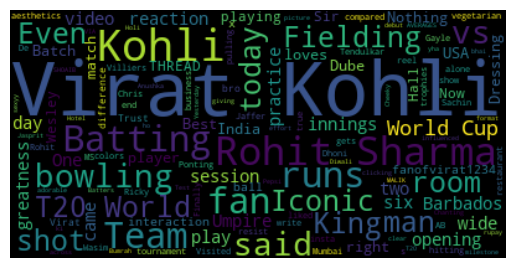

In [29]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [30]:
import seaborn as sns

In [31]:
df.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,4,4,4,4
neutral,38,38,38,38
positive,12,12,12,12


<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

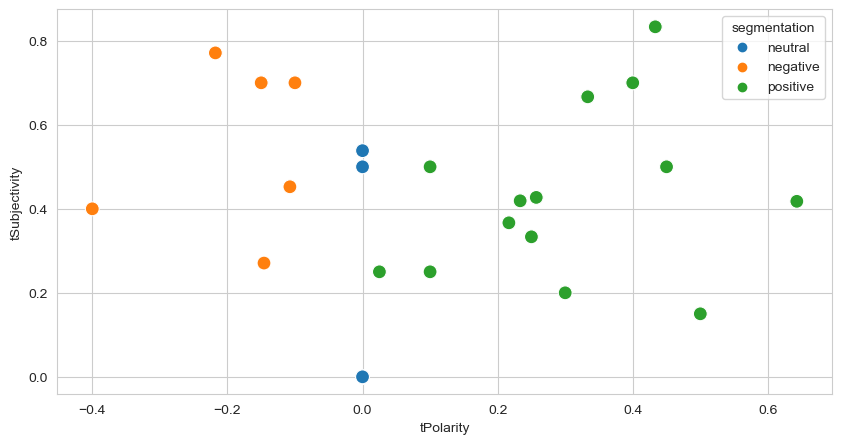

In [68]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<Axes: xlabel='segmentation', ylabel='count'>

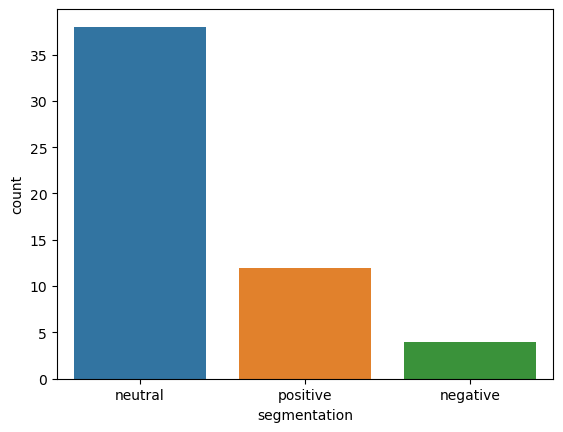

In [32]:

sns.countplot(data=df,x='segmentation')


In [33]:
positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,22.2
1,mayLoose,7.4
2,notSure,70.4


In [ ]:
thank you 